#### 기울기

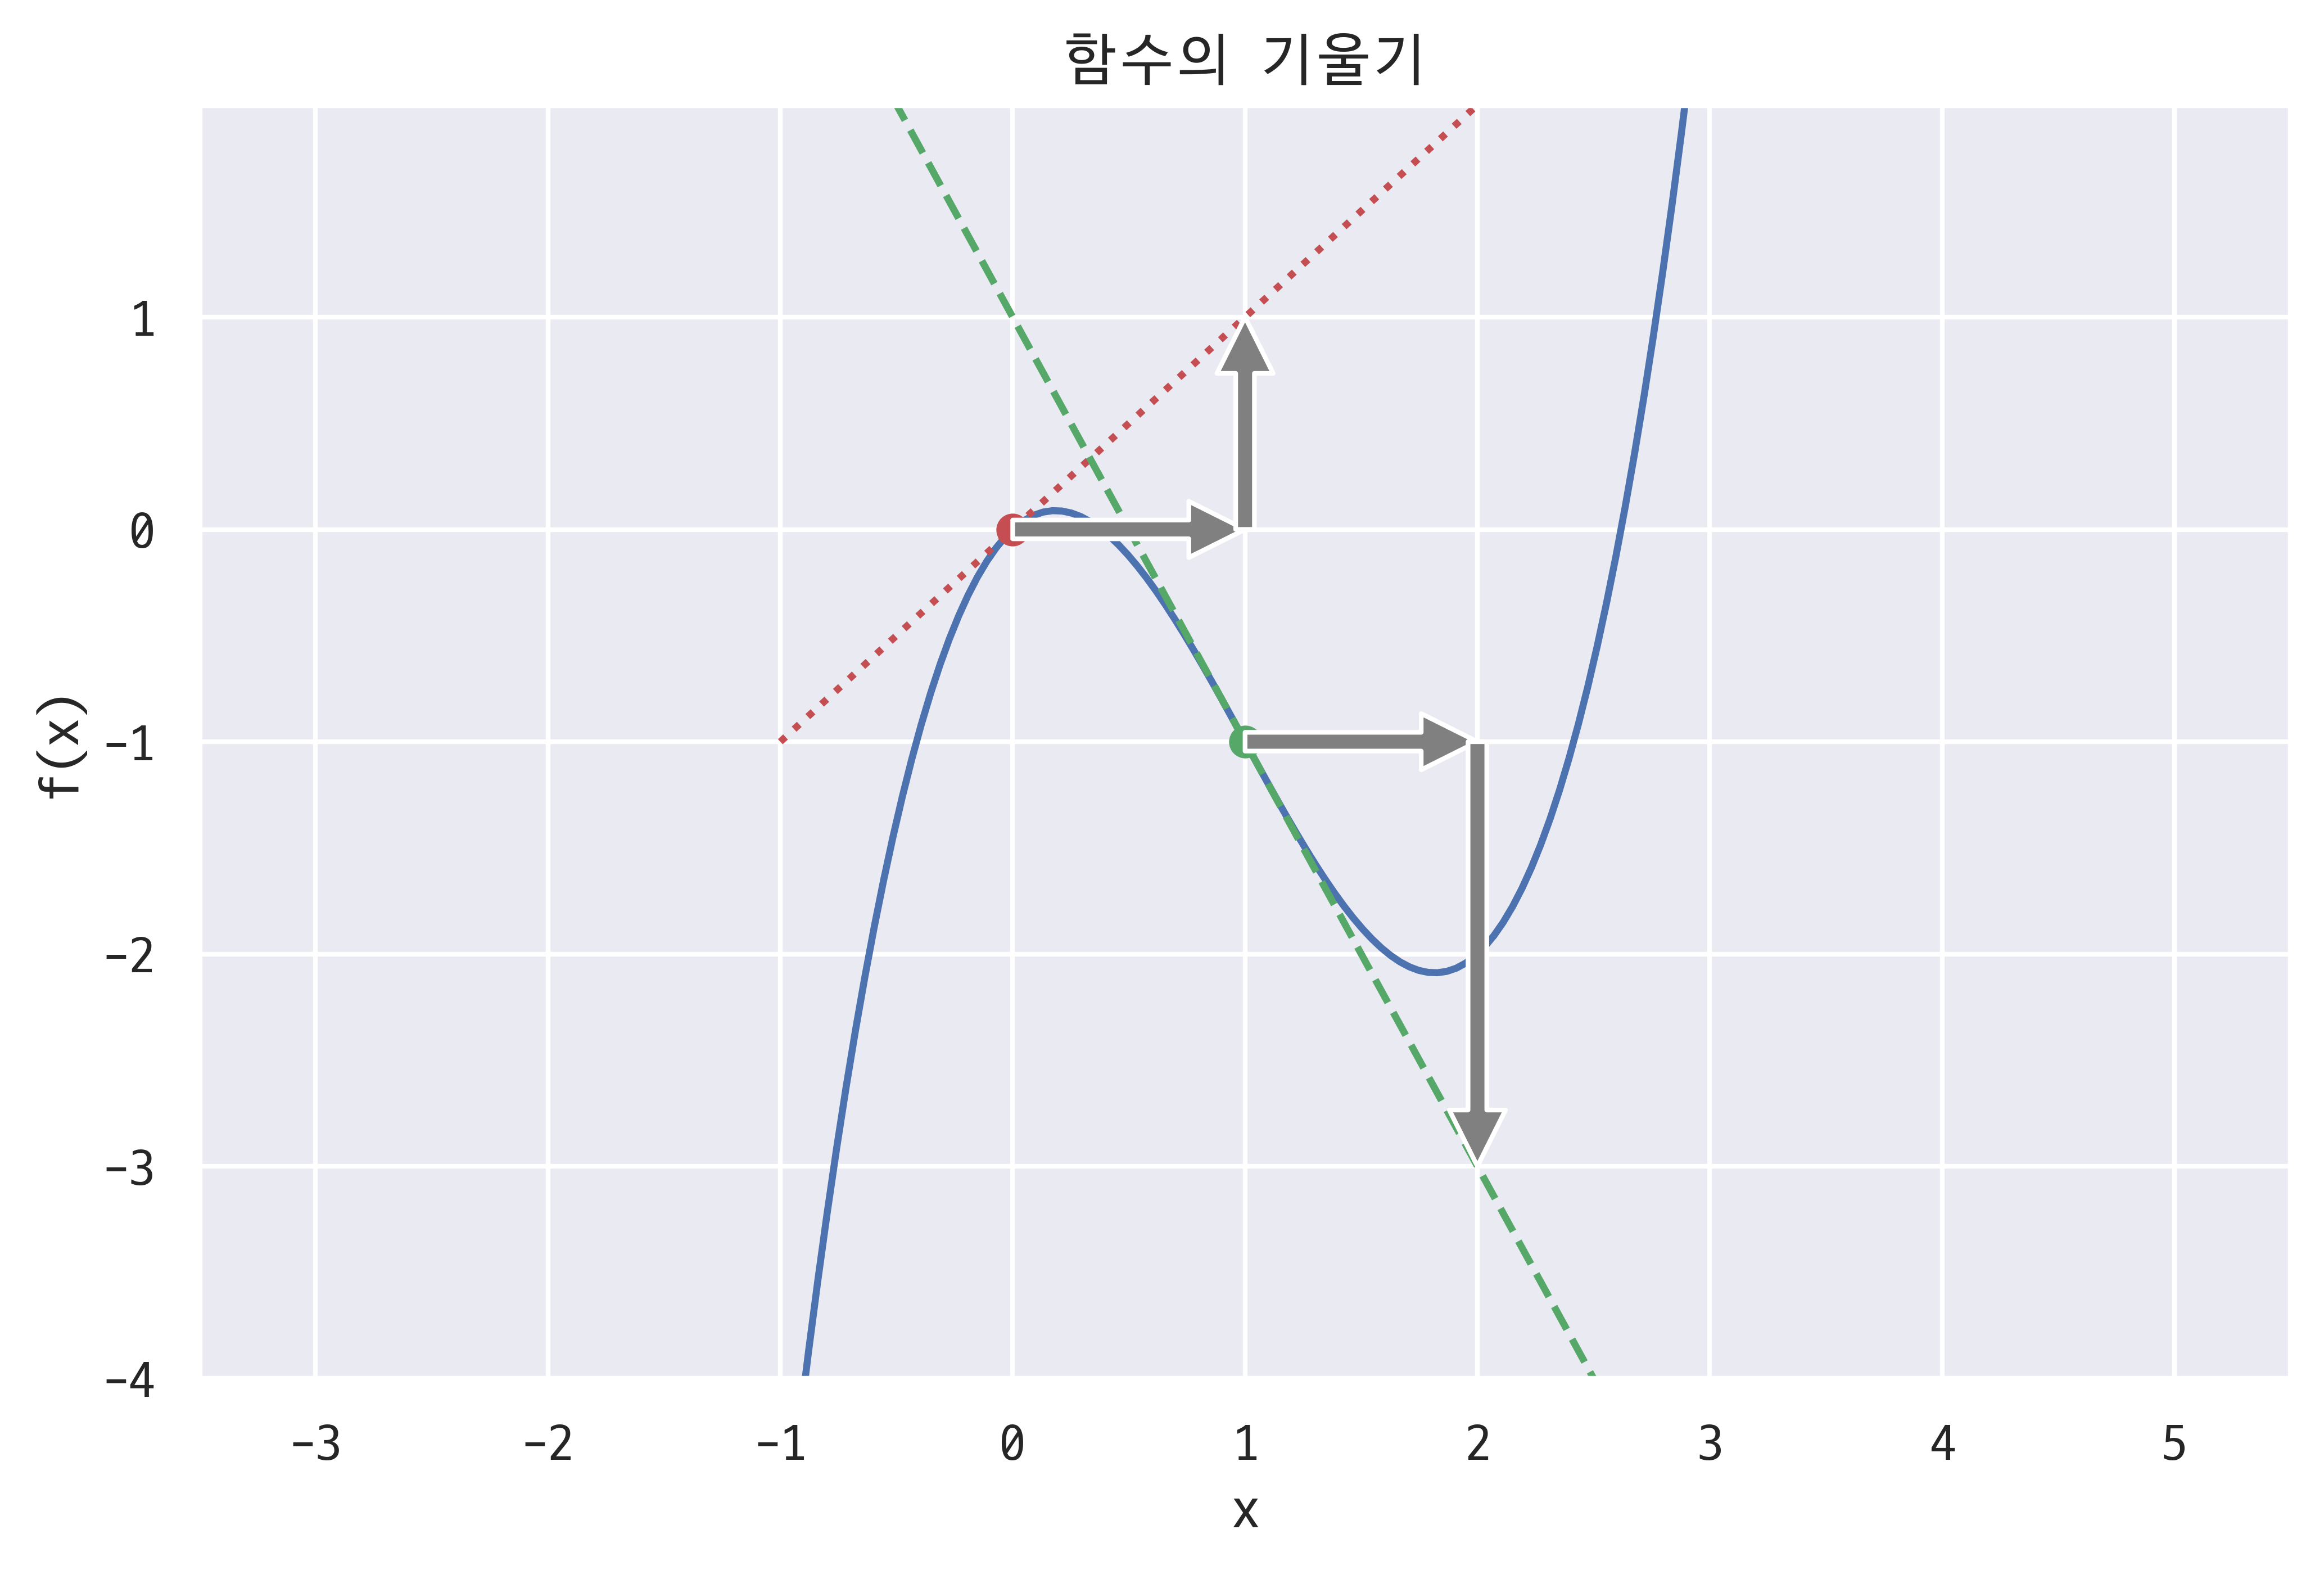

In [1]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 100)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('함수의 기울기')
plt.show()

#### 수치미분

In [12]:
from scipy.misc import derivative

print(derivative(f, 0, dx=1e-6))
print(derivative(f, 1, dx=1e-6))

1.000000000001
-2.000000000002


#### 미분 가능

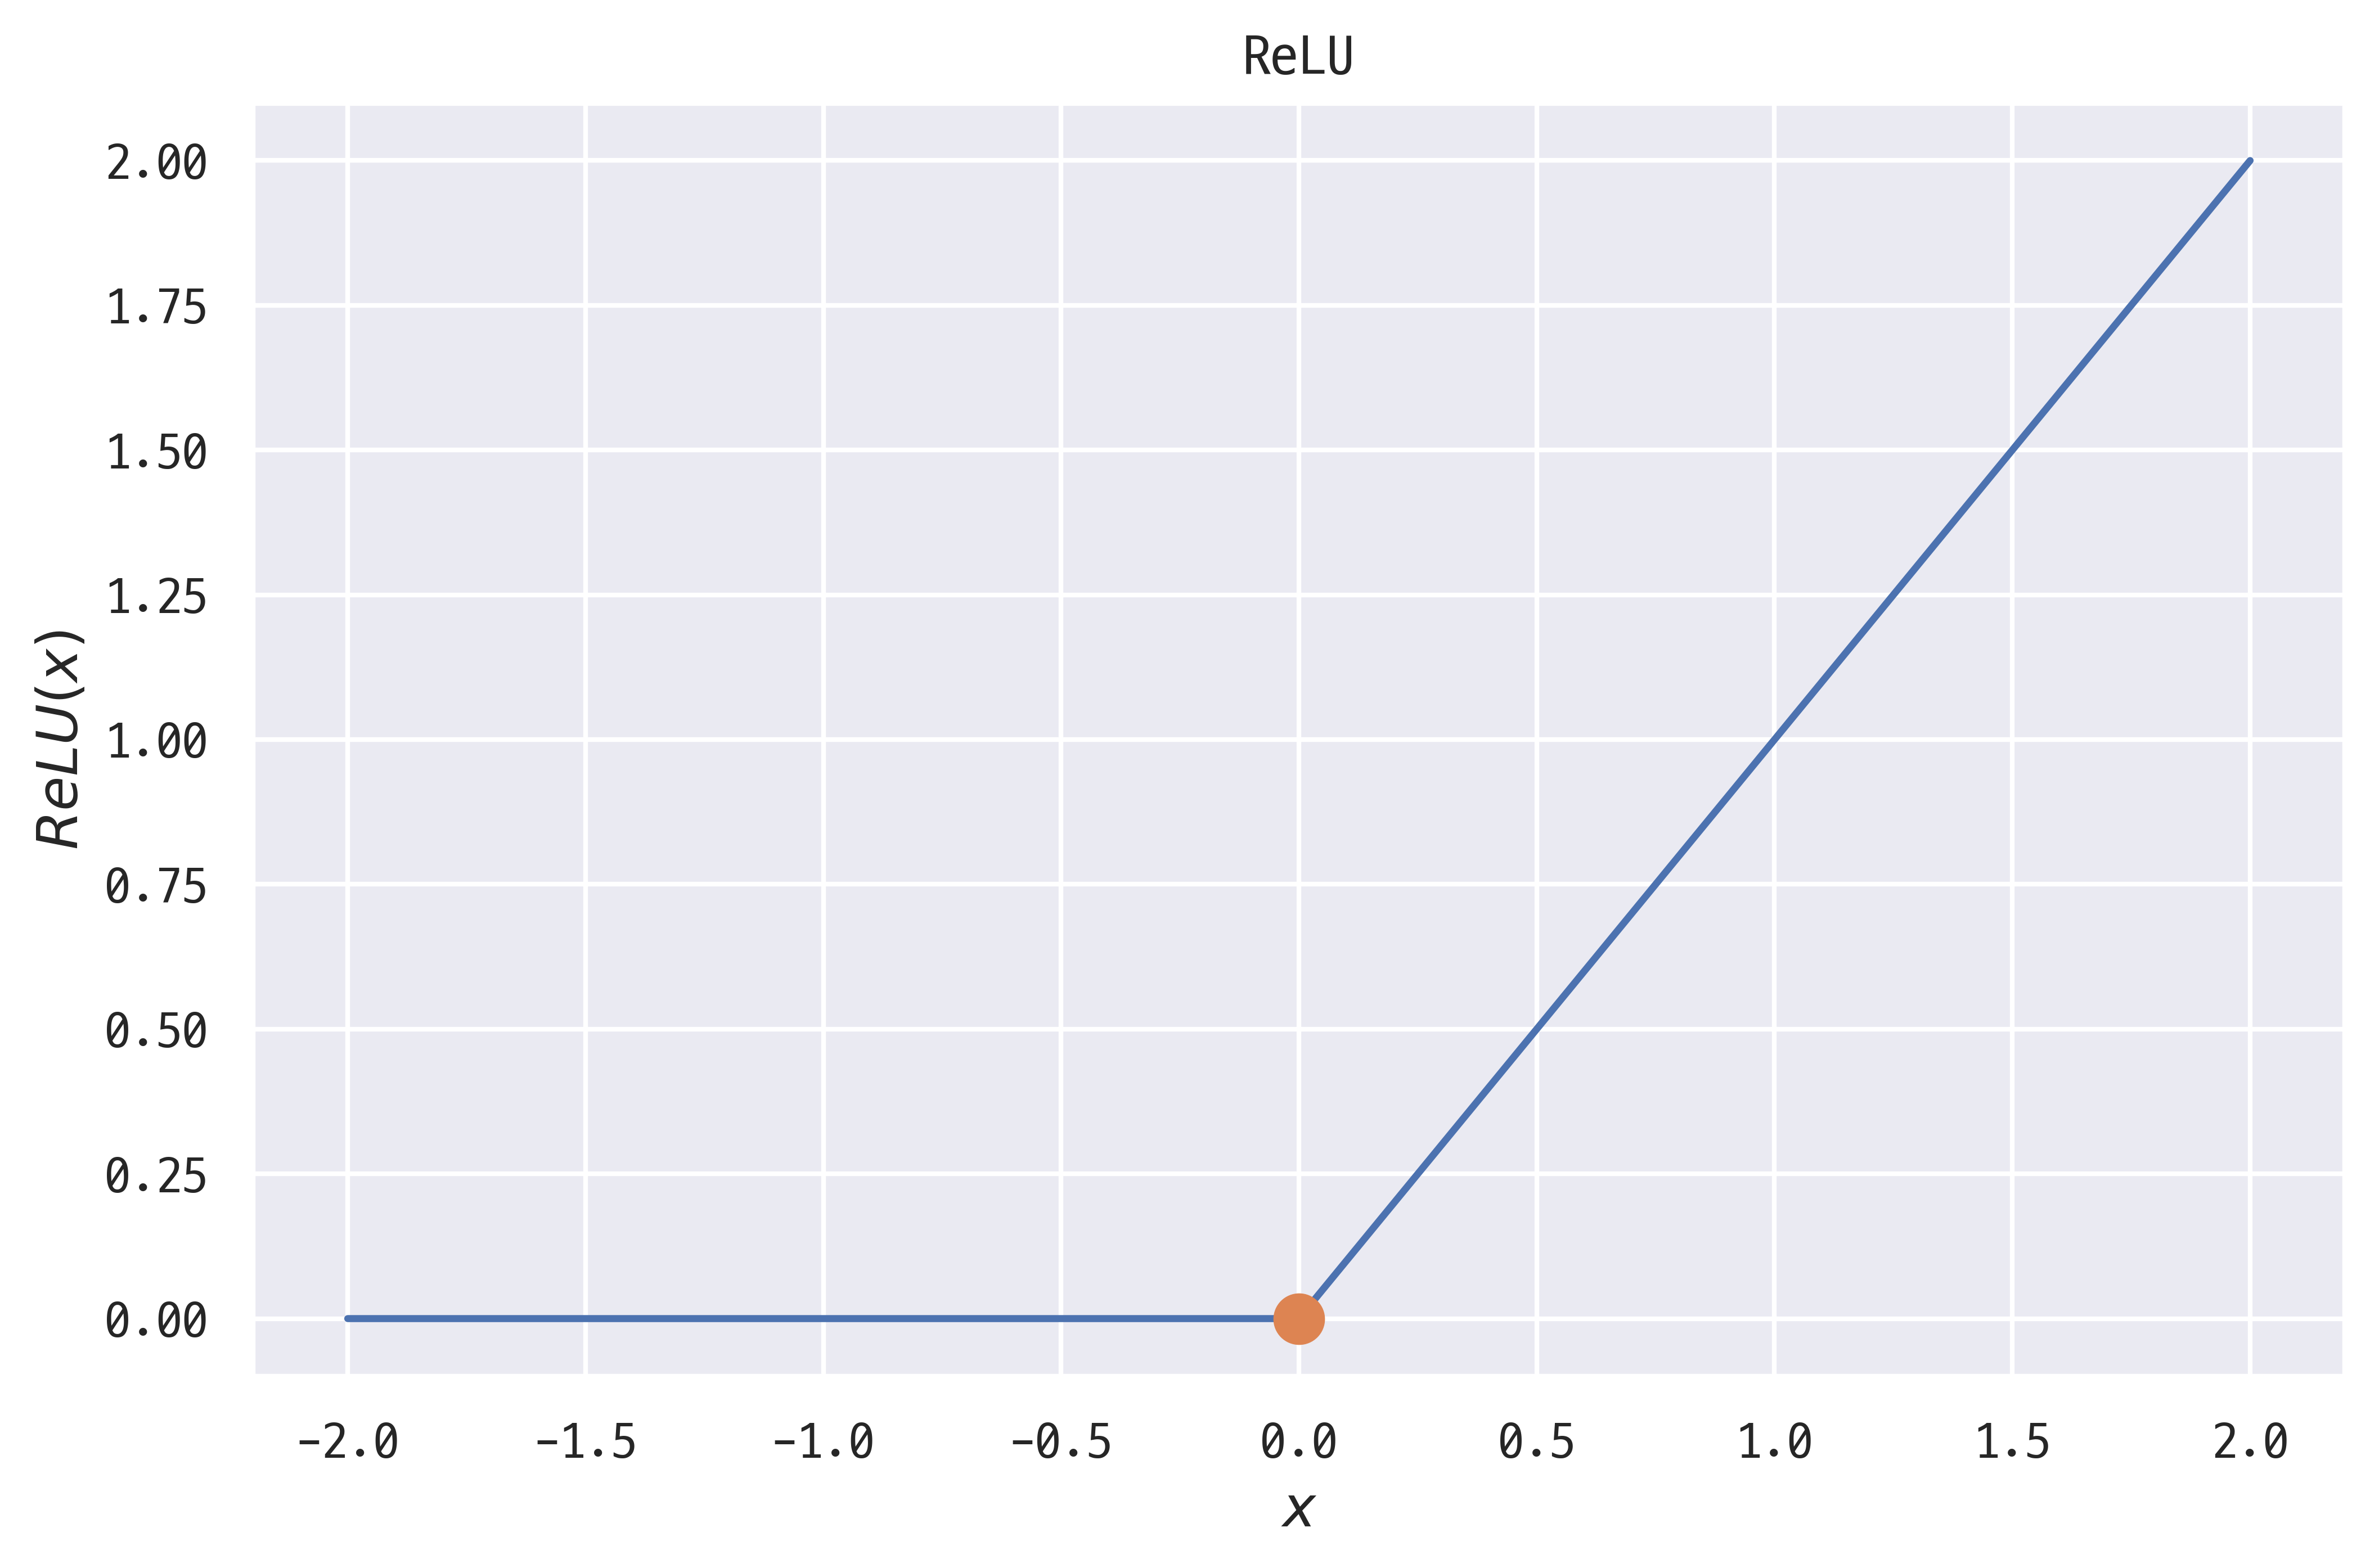

In [13]:
def relu(x):
    return np.where(x > 0, x, 0)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, 'o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

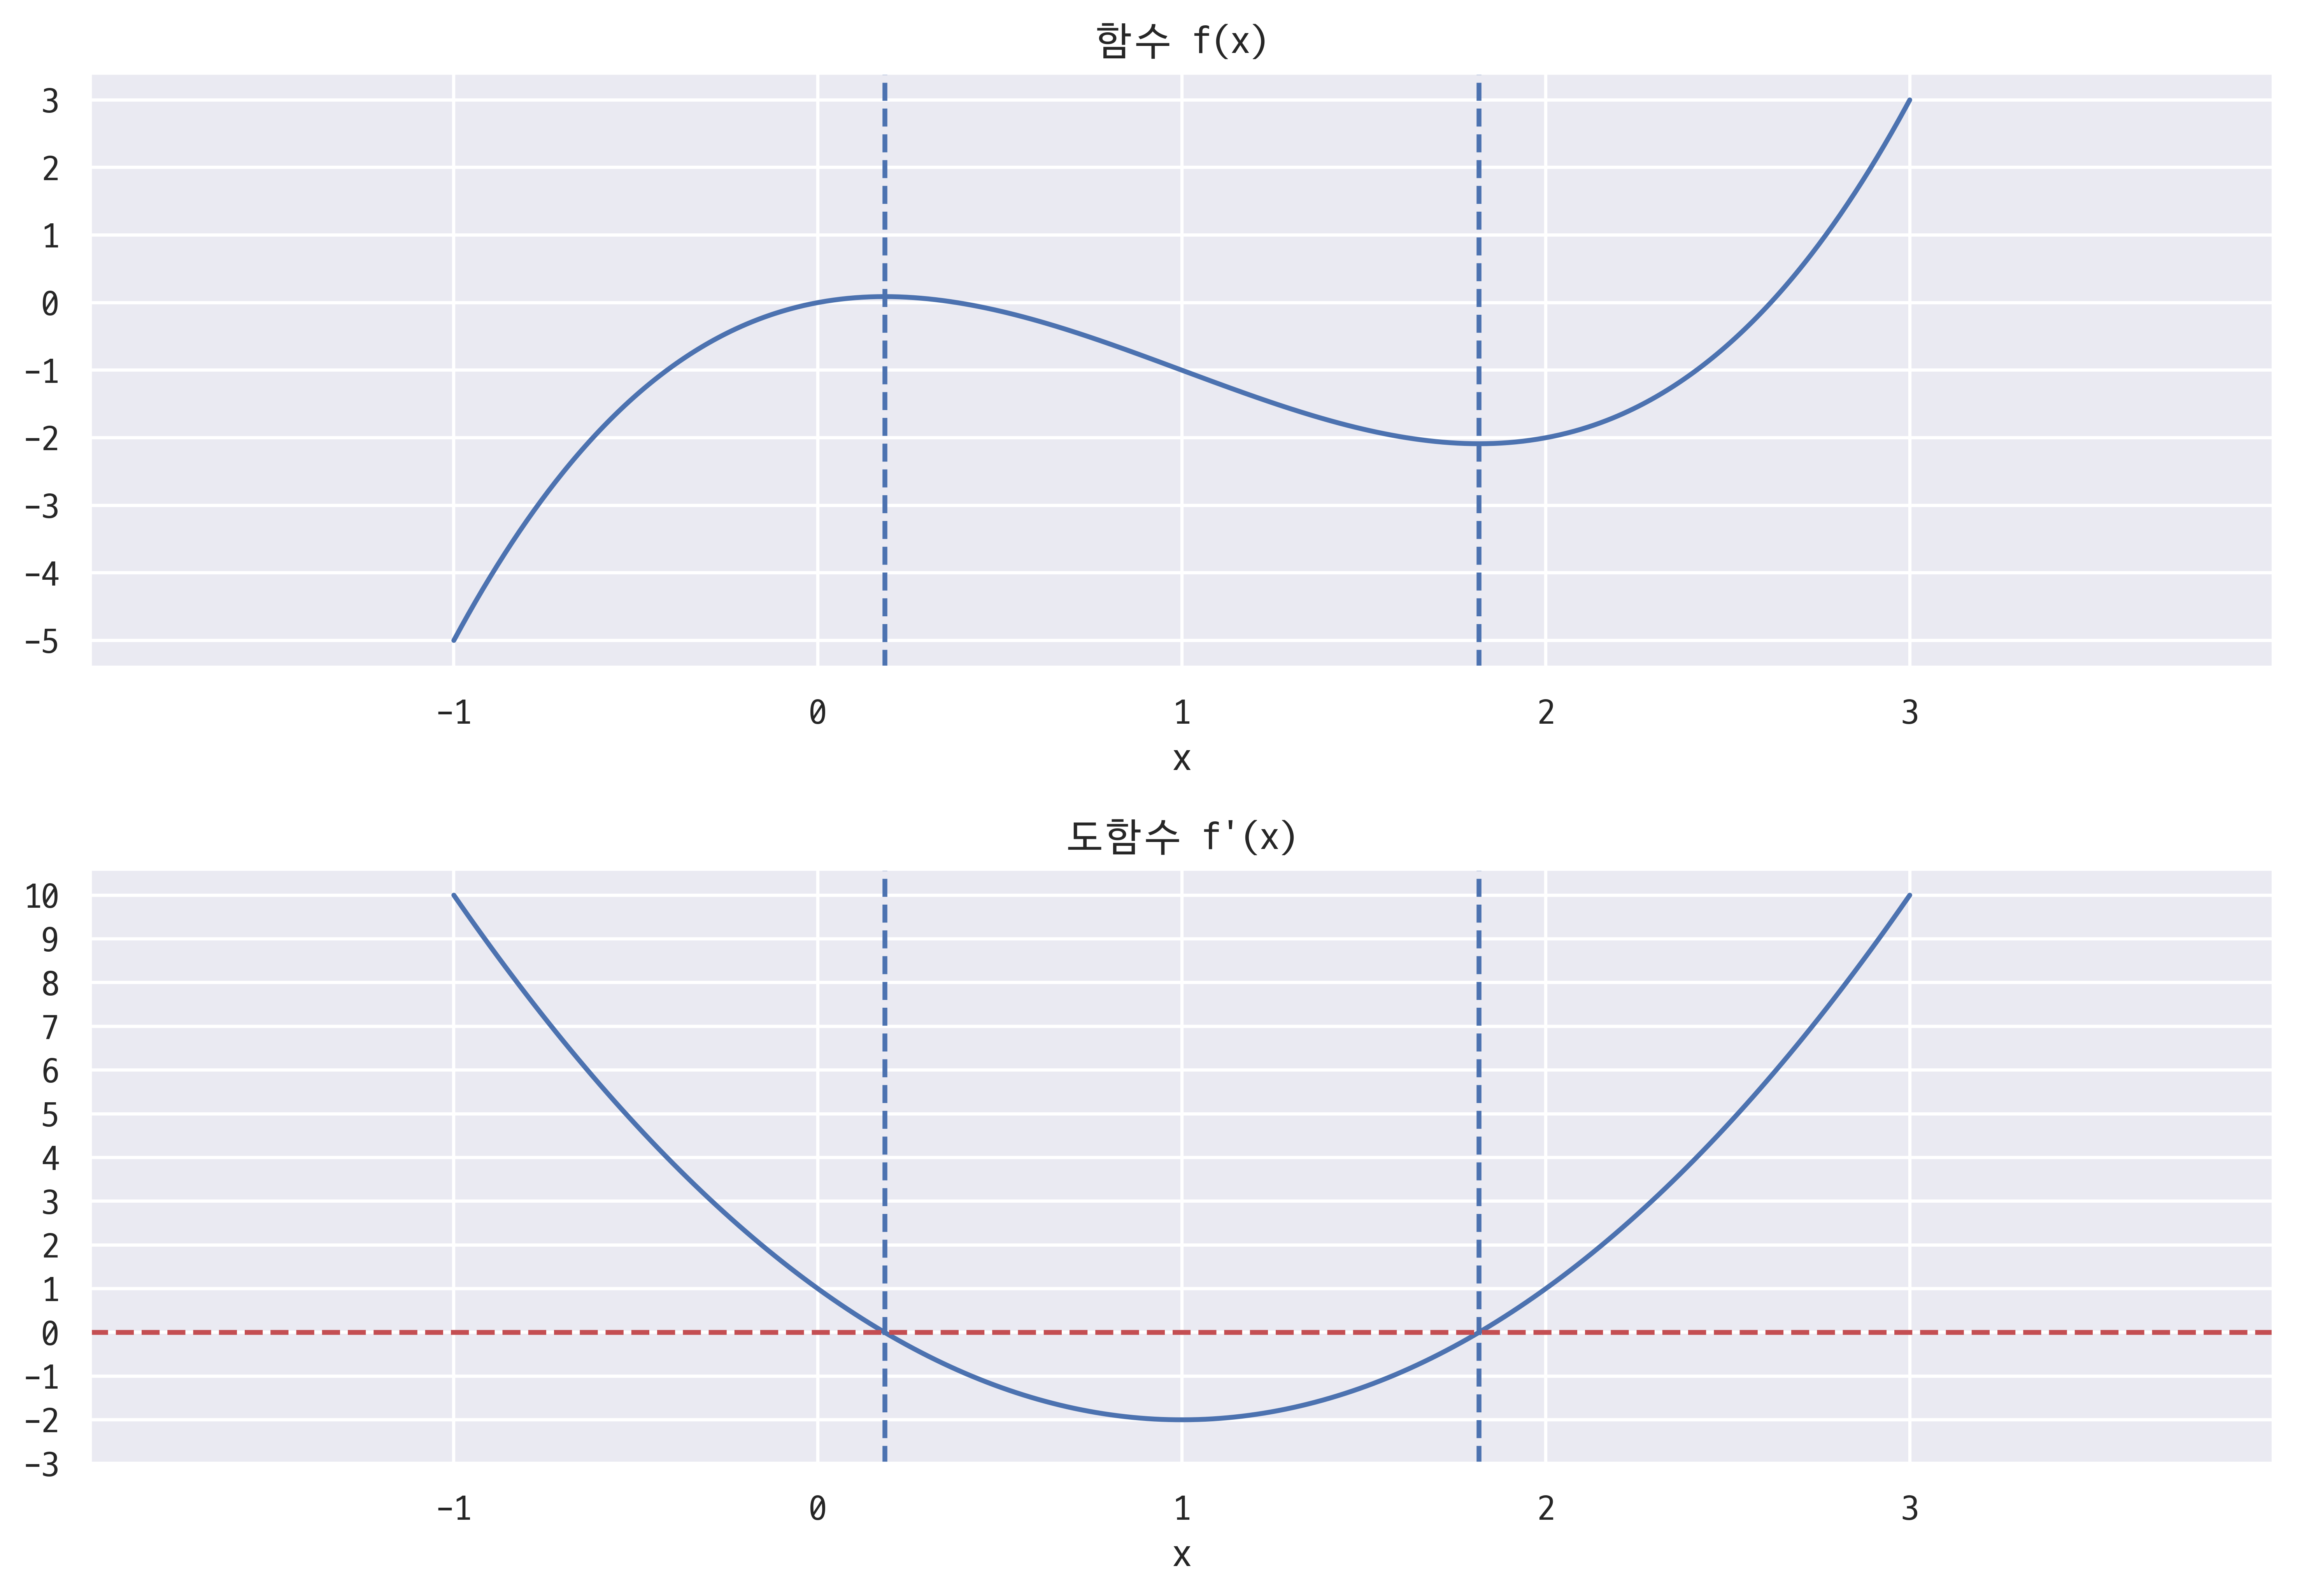

In [15]:
def fprime(x):
    return 3 * x**2 - 6 * x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1])

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('함수 f(x)')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("도함수 f'(x)")
plt.axhline(0, c='r', ls='--')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')

plt.tight_layout()
plt.show()

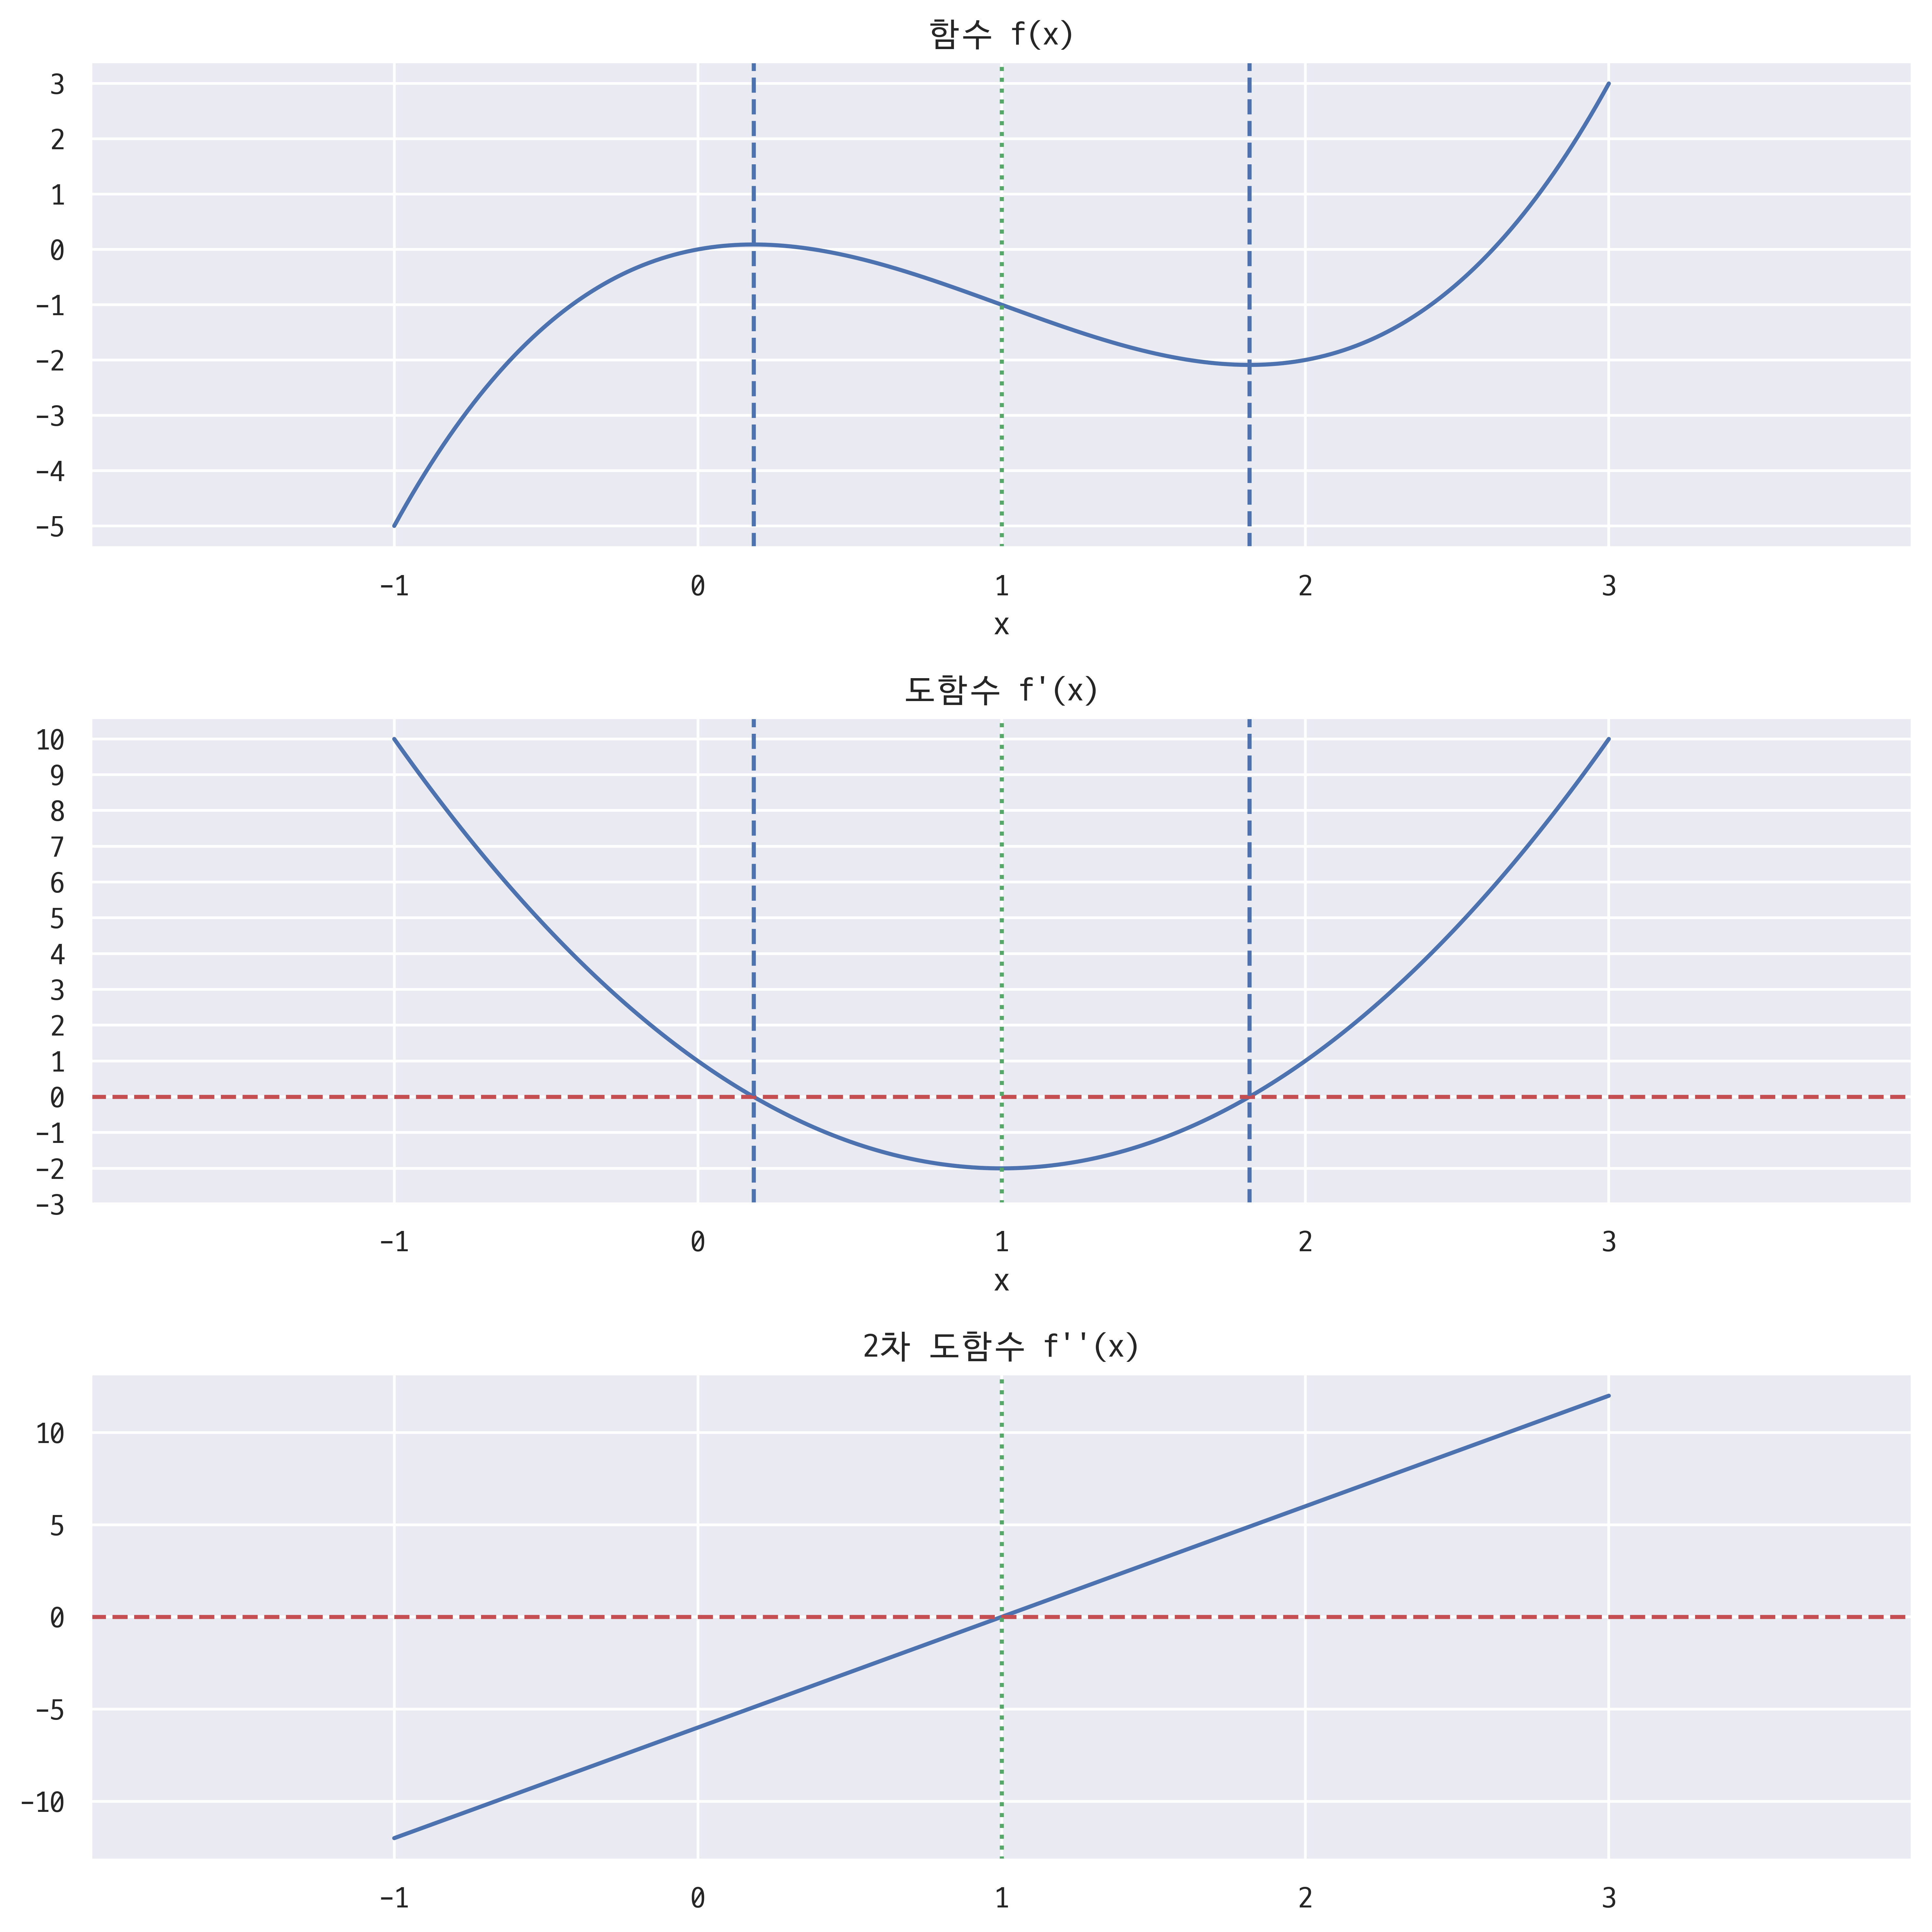

In [16]:
def fprime2(x):
    return 6 * x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1])

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('함수 f(x)')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')
plt.axvline(1, c='g', ls=':')

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("도함수 f'(x)")
plt.axhline(0, c='r', ls='--')
plt.axvline(x1, c='b', ls='--')
plt.axvline(x2, c='b', ls='--')
plt.axvline(1, c='g', ls=':')

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("2차 도함수 f''(x)")
plt.axhline(0, c='r', ls='--')
plt.axvline(1, c='g', ls=':')

plt.tight_layout()
plt.show()

#### 심파이 (SymPy)

In [18]:
import sympy

# Jupyter notebook에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

In [19]:
x = sympy.symbols('x')
x

x

In [20]:
type(x)

sympy.core.symbol.Symbol

In [21]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [22]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [23]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [24]:
x, y = sympy.symbols('x, y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [25]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [27]:
sympy.diff(f, y)

4⋅x + 8⋅y

In [29]:
x, mu, sigma = sympy.symbols('x, mu, sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [30]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [31]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

In [32]:
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

#### Ex. 4.2.5

In [36]:
x = sympy.symbols('x')
f = x ** 3 - 1
sympy.diff(f)

   2
3⋅x 

In [40]:
x, k = sympy.symbols('x, k')
f = sympy.log(x ** 2 - 3 * k)
sympy.simplify(sympy.diff(f, x))

   2⋅x   
─────────
        2
-3⋅k + x 

In [41]:
a, b, x = sympy.symbols('a, b, x')
f = sympy.exp(a * x ** b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

#### Ex. 4.2.6

In [44]:
x, y = sympy.symbols('x, y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
f_x = sympy.simplify(sympy.diff(f, x))
f_y = sympy.simplify(sympy.diff(f, y))
f_xx = sympy.simplify(sympy.diff(f, x, x))
f_xy = sympy.simplify(sympy.diff(f, x, y))
f_yx = sympy.simplify(sympy.diff(f, y, x))
f_yy = sympy.simplify(sympy.diff(f, y, y))
f_x, f_y, f_xx, f_xy, f_yx, f_yy

⎛      2      2        2      2               2      2          2      2      
⎜     x  + 2⋅y        x  + 2⋅y   ⎛   2    ⎞  x  + 2⋅y          x  + 2⋅y       
⎝2⋅x⋅ℯ         , 4⋅y⋅ℯ         , ⎝4⋅x  + 2⎠⋅ℯ         , 8⋅x⋅y⋅ℯ         , 8⋅x⋅

    2      2                2      2⎞
   x  + 2⋅y   ⎛    2    ⎞  x  + 2⋅y ⎟
y⋅ℯ         , ⎝16⋅y  + 4⎠⋅ℯ         ⎠